In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Suppress FutureWarning for n_init
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
df['WH_Manager_ID'].nunique()

25000

In [6]:
df.isnull().sum().sum()/ (df.shape[0]*df.shape[1])

0.022965

### Droping non contributing columns towards model and columns with 30%  more missing values

In [7]:
df.drop(['Ware_house_ID','WH_Manager_ID','wh_est_year'], axis = 1 , inplace = True)

## Treating null values

In [8]:
df.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [9]:
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].mean()) #imputing with mean since it has normal distribution
# Fill missing values with the mode
mode_value = df['approved_wh_govt_certificate'].mode()[0]  # Get the first mode value
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(mode_value)

In [10]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

## List to convert to Categorical Features

In [11]:
# List of columns to convert to category
columns_to_convert = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
                      'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
                      'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply',
                      'temp_reg_mach', 'wh_breakdown_l3m','approved_wh_govt_certificate']

# Convert columns to category using a for loop
for column in columns_to_convert:
    df[column] = df[column].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 25000 non-null  category
 1   WH_capacity_size              25000 non-null  category
 2   zone                          25000 non-null  category
 3   WH_regional_zone              25000 non-null  category
 4   num_refill_req_l3m            25000 non-null  category
 5   transport_issue_l1y           25000 non-null  category
 6   Competitor_in_mkt             25000 non-null  category
 7   retail_shop_num               25000 non-null  int64   
 8   wh_owner_type                 25000 non-null  category
 9   distributor_num               25000 non-null  int64   
 10  flood_impacted                25000 non-null  category
 11  flood_proof                   25000 non-null  category
 12  electric_supply               25000 non-null  

## Seperating the categorical, numerical and target columns

In [13]:
target = df['product_wg_ton'].copy()
df.drop(['product_wg_ton'],axis =1, inplace=True)

df_order = df.columns  #storing the df origiinal order

cat_df = df[df.select_dtypes(include=['category', 'object']).columns].copy()
num_df = df[df.select_dtypes(include=['number']).columns].copy()

In [14]:
cat_df.isnull().sum() #checking for nulls

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
wh_owner_type                   0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
dtype: int64

## Outlier Fix

In [15]:
def cap_outliers_with_bounds(df):
  
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        # Calculate lower and upper bounds based on provided bounds or IQR
        lower_bound_iqr = q1 - 1.5 * iqr 
        upper_bound_iqr = q3 + 1.5 * iqr 
        
        # Cap outliers to the lower and upper bounds
        df[column] = np.clip(df[column], lower_bound_iqr, upper_bound_iqr)
        
    return df

In [16]:
num_df = cap_outliers_with_bounds(num_df)

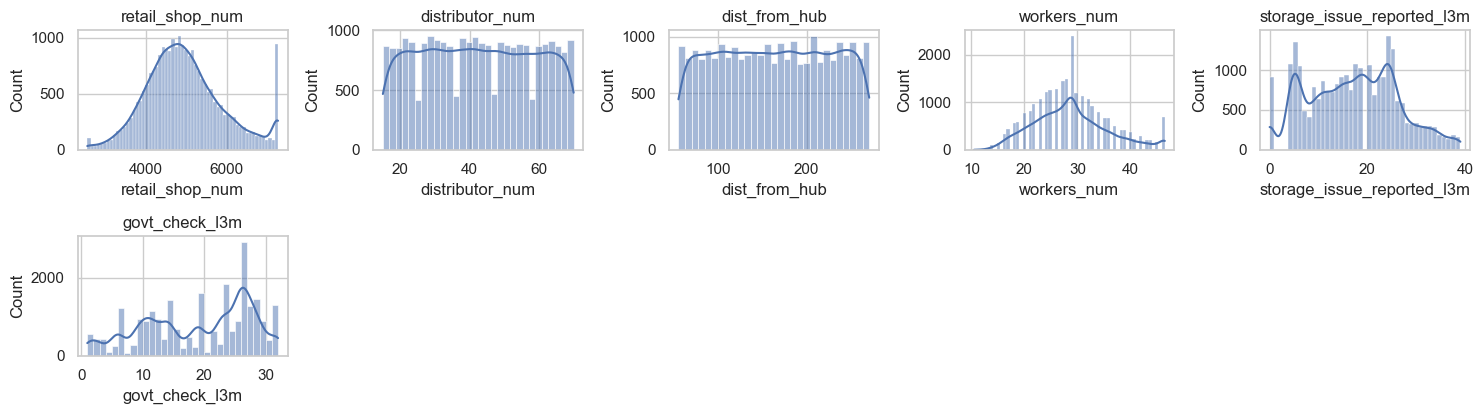

In [17]:
# Display histograms of all features after capping outliers
sns.set(style="whitegrid")  # Set style for seaborn plots
plt.figure(figsize=(15, 10))  # Set figure size

# Loop through each column in the DataFrame and create a histogram
for i, column in enumerate(num_df.columns):
    plt.subplot(5, 5, i + 1)  # Create subplot
    sns.histplot(num_df[column], kde=True)  # Plot histogram with kernel density estimation
    plt.title(column)  # Set title for each subplot

plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()


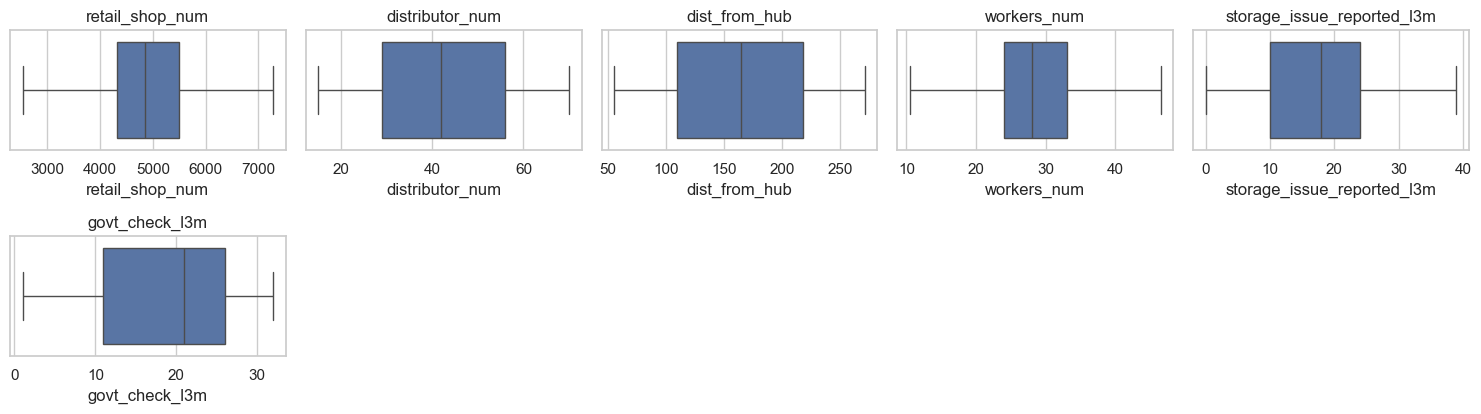

In [18]:
# Display histograms of all features
sns.set(style="whitegrid")  # Set style for seaborn plots
plt.figure(figsize=(15, 10))  # Set figure size

# Loop through each column in the DataFrame and create a histogram
for i, column in enumerate(num_df.columns):
    plt.subplot(5, 5, i + 1)  # Create subplot
    sns.boxplot(num_df[column], orient='h')  # Plot histogram with kernel density estimation
    plt.title(column)  # Set title for each subplot
    
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

## Encoding the Categorical Features

In [19]:
# Initialize a dictionary to store label encoder objects
label_encoders = {}

# Loop through each column in the DataFrame
for column in cat_df.columns:
    # Extract unique categories and their corresponding indices
    unique_categories, indices = np.unique(cat_df[column], return_inverse=True)
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit label encoder to unique categories
    label_encoder.fit(unique_categories)
    # Store the label encoder object in the dictionary
    label_encoders[column] = label_encoder
    # Display the mapping of categories to encoded values
    print(f"Encoding for column '{column}':")
    for category, encoded_value in zip(unique_categories, label_encoder.transform(unique_categories)):
        print(f"  {category} -> {encoded_value}")

    # Update the DataFrame with encoded values
    cat_df[column] = label_encoder.transform(cat_df[column])

cat_order = cat_df.columns #storing the categorical feature order

Encoding for column 'Location_type':
  Rural -> 0
  Urban -> 1
Encoding for column 'WH_capacity_size':
  Large -> 0
  Mid -> 1
  Small -> 2
Encoding for column 'zone':
  East -> 0
  North -> 1
  South -> 2
  West -> 3
Encoding for column 'WH_regional_zone':
  Zone 1 -> 0
  Zone 2 -> 1
  Zone 3 -> 2
  Zone 4 -> 3
  Zone 5 -> 4
  Zone 6 -> 5
Encoding for column 'num_refill_req_l3m':
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  6 -> 6
  7 -> 7
  8 -> 8
Encoding for column 'transport_issue_l1y':
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
Encoding for column 'Competitor_in_mkt':
  0 -> 0
  1 -> 1
  2 -> 2
  3 -> 3
  4 -> 4
  5 -> 5
  6 -> 6
  7 -> 7
  8 -> 8
  9 -> 9
  10 -> 10
  12 -> 11
Encoding for column 'wh_owner_type':
  Company Owned -> 0
  Rented -> 1
Encoding for column 'flood_impacted':
  0 -> 0
  1 -> 1
Encoding for column 'flood_proof':
  0 -> 0
  1 -> 1
Encoding for column 'electric_supply':
  0 -> 0
  1 -> 1
Encoding for column 'temp_reg_mach':
  0 -> 0
 

## Scaling the numerical features

In [20]:
num_order = num_df.columns #storing the original feature order

In [21]:
scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(num_df), columns = num_df.columns)

## Merging the encoded categorical and numerical df

In [22]:
df = pd.concat([cat_df,num_df],axis = 1)
df = df[df_order]
df = pd.concat([df,target],axis =1 )

In [23]:
X = df.drop(['product_wg_ton'],axis = 1)
y = df['product_wg_ton']

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int32  
 1   WH_capacity_size              25000 non-null  int32  
 2   zone                          25000 non-null  int32  
 3   WH_regional_zone              25000 non-null  int32  
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  float64
 8   wh_owner_type                 25000 non-null  int32  
 9   distributor_num               25000 non-null  float64
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [25]:
X

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,1,2,3,5,3,1,2,-0.317618,1,-1.146546,0,1,1,-1.156575,0.031681,-0.450876,0,0,5,-0.441634
1,0,0,1,4,0,0,4,1.297843,0,0.285226,0,0,1,0.740827,0.311916,-1.433309,0,0,3,-0.209944
2,0,1,2,1,1,0,4,-0.673514,0,1.343493,0,0,0,-0.040456,1.152622,-0.014239,0,0,6,0.369282
3,0,1,1,2,7,4,2,1.073989,1,0.471979,0,0,0,-0.965240,-1.089261,-0.014239,1,1,3,0.948508
4,0,0,1,4,3,1,2,-0.225807,0,-0.026028,1,0,1,-0.821739,-0.528790,0.094921,0,4,6,0.600972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3,0,4,0.444723,1,-1.457801,0,0,1,-0.343403,0.732269,0.531558,1,0,2,1.296044
24996,0,1,3,1,6,0,4,-0.483703,0,0.907736,0,0,1,-0.534737,-0.108437,-0.778354,0,2,4,-0.094099
24997,1,0,2,4,7,0,2,0.458134,1,-0.710789,1,0,1,-0.263680,0.023890,0.640717,0,3,5,0.716818
24998,0,2,1,0,1,0,2,2.394933,1,-1.084295,0,0,1,-1.650856,-0.528790,0.094921,0,0,6,1.296044


### Recursive Feature Selection Done in Project Notes 1 is converted into List

In [26]:
# Assuming you have a list of indices named indices_list
indices_list = [
    ['retail_shop_num', 'storage_issue_reported_l3m', 'approved_wh_govt_certificate'],
    ['retail_shop_num', 'dist_from_hub', 'storage_issue_reported_l3m', 'approved_wh_govt_certificate'],
    ['retail_shop_num', 'distributor_num', 'dist_from_hub', 'storage_issue_reported_l3m', 'approved_wh_govt_certificate'],
    ['retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'approved_wh_govt_certificate'],
    ['retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'approved_wh_govt_certificate', 'govt_check_l3m'],
    ['transport_issue_l1y', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'approved_wh_govt_certificate', 'govt_check_l3m'],
    ['transport_issue_l1y', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'approved_wh_govt_certificate', 'govt_check_l3m'],
    ['num_refill_req_l3m', 'transport_issue_l1y', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'approved_wh_govt_certificate', 'govt_check_l3m'],
    ['num_refill_req_l3m', 'transport_issue_l1y', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']
]

# Create variables dynamically to store dataframes
for i, index_set in enumerate(indices_list, start=3):  # Start from X_3
    vars()[f'X_{i}'] = df[index_set]


## KMeans Clustering and Labeling

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
    
# Fit KMeans to the data
kmeans.fit(X_6)

KMeans(n_clusters=3, random_state=42)

In [28]:
cluster_labels = kmeans.labels_

In [29]:
clustered_df = X.copy()

In [30]:
clustered_df['product_wg_ton'] = target

In [31]:
clustered_df['Cluster'] = cluster_labels

In [32]:
clustered_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Cluster
0,1,2,3,5,3,1,2,-0.317618,1,-1.146546,...,1,-1.156575,0.031681,-0.450876,0,0,5,-0.441634,17115,1
1,0,0,1,4,0,0,4,1.297843,0,0.285226,...,1,0.740827,0.311916,-1.433309,0,0,3,-0.209944,5074,1
2,0,1,2,1,1,0,4,-0.673514,0,1.343493,...,0,-0.040456,1.152622,-0.014239,0,0,6,0.369282,23137,1
3,0,1,1,2,7,4,2,1.073989,1,0.471979,...,0,-0.965240,-1.089261,-0.014239,1,1,3,0.948508,22115,1
4,0,0,1,4,3,1,2,-0.225807,0,-0.026028,...,1,-0.821739,-0.528790,0.094921,0,4,6,0.600972,24071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3,0,4,0.444723,1,-1.457801,...,1,-0.343403,0.732269,0.531558,1,0,2,1.296044,32093,1
24996,0,1,3,1,6,0,4,-0.483703,0,0.907736,...,1,-0.534737,-0.108437,-0.778354,0,2,4,-0.094099,12114,2
24997,1,0,2,4,7,0,2,0.458134,1,-0.710789,...,1,-0.263680,0.023890,0.640717,0,3,5,0.716818,27080,0
24998,0,2,1,0,1,0,2,2.394933,1,-1.084295,...,1,-1.650856,-0.528790,0.094921,0,0,6,1.296044,25093,1


## Inverse Encoding and Scaling

In [33]:
inv_cat = X[cat_order]
inv_num = X[num_order]

In [34]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
inv_cat_copy = inv_cat.copy()

# Perform inverse transformation for each column
for column, encoder in label_encoders.items():
    # Inverse transform the numerical labels back to categorical labels
    inv_cat_copy.loc[:, column] = encoder.inverse_transform(inv_cat_copy[column])

In [35]:
# Perform inverse scaling
inv_num = pd.DataFrame(scaler.inverse_transform(inv_num), columns=inv_num.columns)

In [36]:
en_X = pd.concat([inv_cat_copy,inv_num],axis = 1)
en_X = en_X[df_order]

In [37]:
en_X['product_wg_ton'] = target
en_X['Cluster'] = cluster_labels

In [38]:
en_X

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Cluster
0,Urban,Small,West,Zone 6,3,1,2,4651.0,Rented,24.0,...,1,91.0,29.000000,13.0,0,A,5,15.0,17115,1
1,Rural,Large,North,Zone 5,0,0,4,6217.0,Company Owned,47.0,...,1,210.0,31.000000,4.0,0,A,3,17.0,5074,1
2,Rural,Mid,South,Zone 2,1,0,4,4306.0,Company Owned,64.0,...,0,161.0,37.000000,17.0,0,A,6,22.0,23137,1
3,Rural,Mid,North,Zone 3,7,4,2,6000.0,Rented,50.0,...,0,103.0,21.000000,17.0,1,A+,3,27.0,22115,1
4,Rural,Large,North,Zone 5,3,1,2,4740.0,Company Owned,42.0,...,1,112.0,25.000000,18.0,0,C,6,24.0,24071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Rural,Small,North,Zone 1,3,0,4,5390.0,Rented,19.0,...,1,142.0,34.000000,22.0,1,A,2,30.0,32093,1
24996,Rural,Mid,West,Zone 2,6,0,4,4490.0,Company Owned,57.0,...,1,130.0,28.000000,10.0,0,B,4,18.0,12114,2
24997,Urban,Large,South,Zone 5,7,0,2,5403.0,Rented,31.0,...,1,147.0,28.944398,23.0,0,B+,5,25.0,27080,0
24998,Rural,Small,North,Zone 1,1,0,2,7280.5,Rented,25.0,...,1,60.0,25.000000,18.0,0,A,6,30.0,25093,1


In [39]:
clustered_df.groupby(['Cluster'])['product_wg_ton'].mean()

Cluster
0    28927.352250
1    25349.951253
2    10501.161029
Name: product_wg_ton, dtype: float64

In [40]:
# Specify the file name for the CSV file
csv_file_name = "output_file_3c.xlsx"

# Output the DataFrame to a CSV file in the current directory
en_X.to_excel(csv_file_name, index=False)

In [41]:
clustered_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Cluster
0,1,2,3,5,3,1,2,-0.317618,1,-1.146546,...,1,-1.156575,0.031681,-0.450876,0,0,5,-0.441634,17115,1
1,0,0,1,4,0,0,4,1.297843,0,0.285226,...,1,0.740827,0.311916,-1.433309,0,0,3,-0.209944,5074,1
2,0,1,2,1,1,0,4,-0.673514,0,1.343493,...,0,-0.040456,1.152622,-0.014239,0,0,6,0.369282,23137,1
3,0,1,1,2,7,4,2,1.073989,1,0.471979,...,0,-0.965240,-1.089261,-0.014239,1,1,3,0.948508,22115,1
4,0,0,1,4,3,1,2,-0.225807,0,-0.026028,...,1,-0.821739,-0.528790,0.094921,0,4,6,0.600972,24071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,2,1,0,3,0,4,0.444723,1,-1.457801,...,1,-0.343403,0.732269,0.531558,1,0,2,1.296044,32093,1
24996,0,1,3,1,6,0,4,-0.483703,0,0.907736,...,1,-0.534737,-0.108437,-0.778354,0,2,4,-0.094099,12114,2
24997,1,0,2,4,7,0,2,0.458134,1,-0.710789,...,1,-0.263680,0.023890,0.640717,0,3,5,0.716818,27080,0
24998,0,2,1,0,1,0,2,2.394933,1,-1.084295,...,1,-1.650856,-0.528790,0.094921,0,0,6,1.296044,25093,1


### Split the dataset

In [42]:
X = clustered_df.drop(['Cluster'], axis=1)
y = clustered_df['Cluster']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17500, 21)
(7500, 21)
(17500,)
(7500,)


### DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Predicting on the testing data
y_pred = clf.predict(X_test)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9942666666666666


In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2505,    0,   27],
       [   0, 2674,    0],
       [  16,    0, 2278]], dtype=int64)

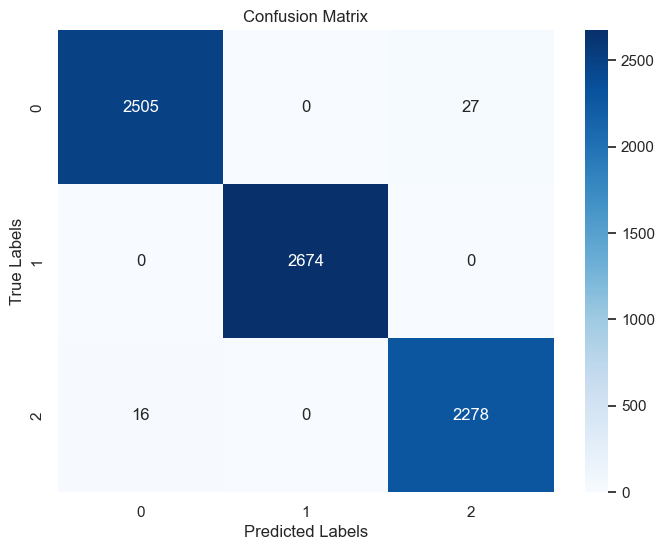

In [47]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2532
           1       1.00      1.00      1.00      2674
           2       0.99      0.99      0.99      2294

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [49]:
feature_df = pd.DataFrame({'Feature':clf.feature_names_in_,'Values':clf.feature_importances_})

In [50]:
feature_df.sort_values(by='Values',ascending=False).reset_index(drop=True).head(5)

,Feature,Values
0,approved_wh_govt_certificate,0.554297
1,storage_issue_reported_l3m,0.414585
2,dist_from_hub,0.022355
3,workers_num,0.004935
4,electric_supply,0.000888


### ExtraTree Classifier

In [51]:
extra_tree = ExtraTreeClassifier(random_state=42)
clf = extra_tree.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [52]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2326,   88,  118],
       [  99, 2539,   36],
       [ 158,   41, 2095]], dtype=int64)

In [53]:
feature_df = pd.DataFrame({'Feature':clf.feature_names_in_,'Values':clf.feature_importances_})

In [54]:
feature_df.sort_values(by='Values',ascending=False).reset_index(drop=True).head(5)

,Feature,Values
0,approved_wh_govt_certificate,0.537949
1,storage_issue_reported_l3m,0.242161
2,product_wg_ton,0.091229
3,temp_reg_mach,0.015775
4,wh_breakdown_l3m,0.015302


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2532
           1       0.95      0.95      0.95      2674
           2       0.93      0.91      0.92      2294

    accuracy                           0.93      7500
   macro avg       0.93      0.93      0.93      7500
weighted avg       0.93      0.93      0.93      7500



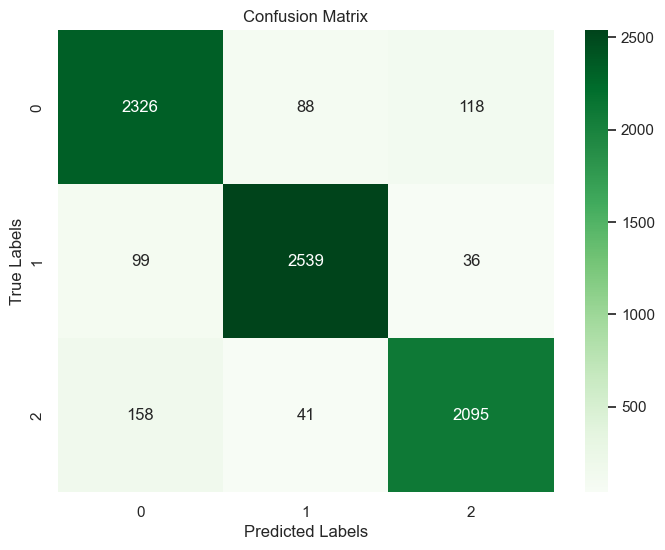

In [56]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### K nearest neighbors

In [57]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test,y_pred)

0.7542666666666666

In [58]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2020,  448,   64],
       [ 640, 1710,  324],
       [ 241,  126, 1927]], dtype=int64)

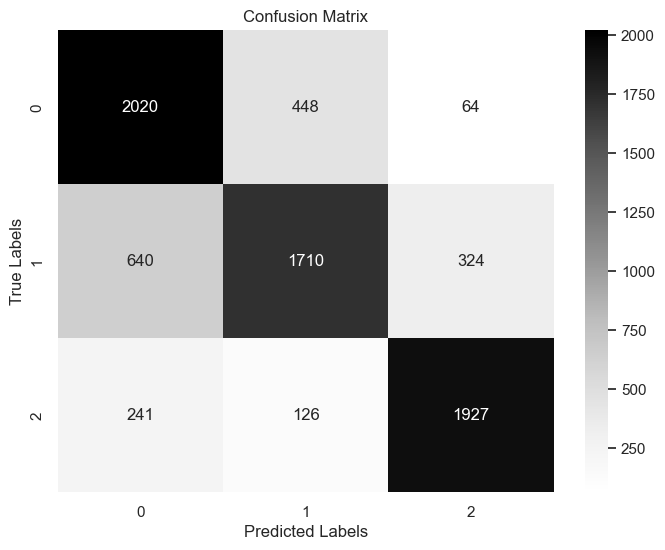

In [59]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74      2532
           1       0.75      0.64      0.69      2674
           2       0.83      0.84      0.84      2294

    accuracy                           0.75      7500
   macro avg       0.76      0.76      0.76      7500
weighted avg       0.76      0.75      0.75      7500



### Ensemble Models

### Decision Tree - Bagging

In [61]:
# Initialize the base Decision Tree Classifier
base_tree = DecisionTreeClassifier(random_state=42)

In [62]:
bagging_classifier = BaggingClassifier(base_estimator=base_tree, n_estimators=100, random_state=42)

In [63]:
# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = bagging_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9958666666666667


In [64]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2514,    0,   18],
       [   0, 2674,    0],
       [  13,    0, 2281]], dtype=int64)

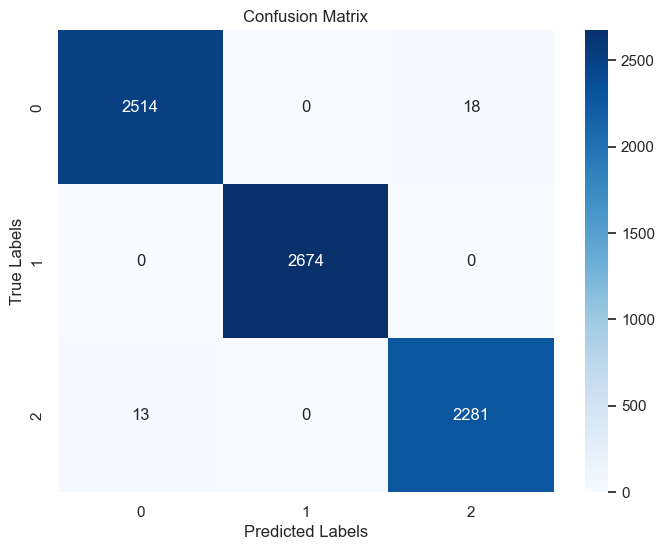

In [65]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2532
           1       1.00      1.00      1.00      2674
           2       0.99      0.99      0.99      2294

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



### Ensemble Extra Tree Classifier

In [67]:
# Initialize the Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the Extra Trees Classifier
extra_trees_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = extra_trees_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9901333333333333


In [68]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2512,    0,   20],
       [   0, 2674,    0],
       [  54,    0, 2240]], dtype=int64)

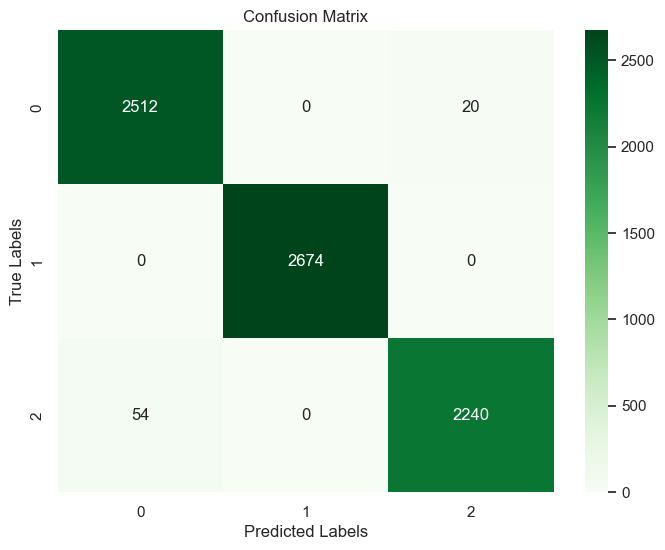

In [69]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2532
           1       1.00      1.00      1.00      2674
           2       0.99      0.98      0.98      2294

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



### Ensemble Random Forest

In [71]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9896


In [72]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2495,    0,   37],
       [   0, 2674,    0],
       [  41,    0, 2253]], dtype=int64)

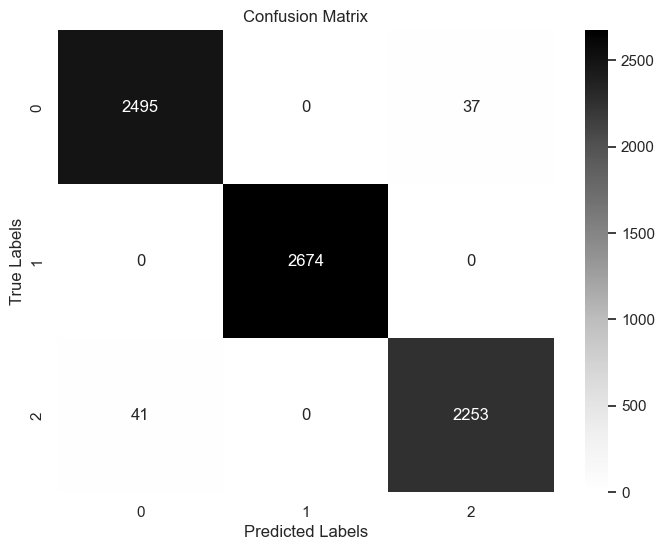

In [73]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2532
           1       1.00      1.00      1.00      2674
           2       0.98      0.98      0.98      2294

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



### AdaBoost

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
# Initialize the base Decision Tree classifier
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier with the Decision Tree base estimator
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost classifier
ada_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ada_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9790666666666666


In [77]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2521,    0,   11],
       [   0, 2674,    0],
       [ 146,    0, 2148]], dtype=int64)

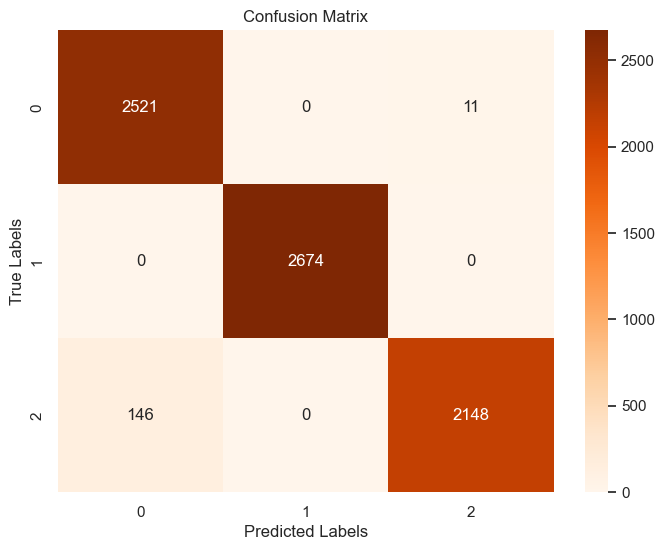

In [78]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2532
           1       1.00      1.00      1.00      2674
           2       0.99      0.94      0.96      2294

    accuracy                           0.98      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       0.98      0.98      0.98      7500



### Gradient Boost

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_depth=8)

# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9965333333333334


In [82]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2516,    0,   16],
       [   0, 2674,    0],
       [  10,    0, 2284]], dtype=int64)

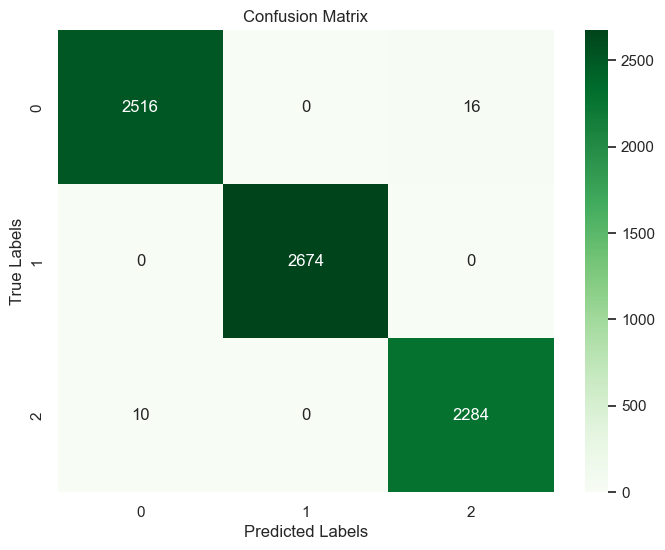

In [83]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2532
           1       1.00      1.00      1.00      2674
           2       0.99      1.00      0.99      2294

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



### Top 5 Contributing Features to the best model

In [85]:
features_name = pd.DataFrame({'Features':gb_classifier.feature_names_in_,'Values':gb_classifier.feature_importances_})

In [86]:
features_name.sort_values(by='Values',ascending=False).head(5).reset_index(drop=True)

,Features,Values
0,approved_wh_govt_certificate,0.681582
1,product_wg_ton,0.152953
2,storage_issue_reported_l3m,0.134287
3,dist_from_hub,0.024479
4,workers_num,0.004474


## Linear Regression Approach

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
import statsmodels.api as sm


In [89]:
X_1 = clustered_df.drop(['Cluster','product_wg_ton'], axis=1)
y_1 = clustered_df['product_wg_ton']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=42)

In [91]:
# Add a constant term to the predictors for both training and testing sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the linear regression model on the training data
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Evaluate the model on the testing data
y_pred = results.predict(X_test)

# You can then evaluate the model's performance using various metrics such as mean squared error (MSE)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.778e+04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:            -1.5548e+05
No. Observations:               17500   AIC:                         3.110e+05
Df Residuals:                   17479   BIC:                         3.112e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [92]:
random_state = 42
# Extract initial p-values
p_values = results.pvalues

# Iterate until all p-values are below 0.05
while (p_values > 0.05).any():
    # Find the feature with the highest p-value
    removal_feature = p_values.idxmax()
    
    # Check if the feature exists in the dataset before attempting to drop it
    if removal_feature in X_train.columns:
        # Drop the feature from both training and test datasets
        X_train.drop(removal_feature, axis=1, inplace=True)
        X_test.drop(removal_feature, axis=1, inplace=True)
    
    # Refit the model
    model = sm.OLS(y_train, X_train)
    result = model.fit()
    
    # Extract p-values
    p_values = result.pvalues

In [93]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.259e+05
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:36:47   Log-Likelihood:            -1.5549e+05
No. Observations:               17500   AIC:                         3.110e+05
Df Residuals:                   17493   BIC:                         3.110e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [94]:
# Evaluate the model on the testing data
y_pred = result.predict(X_test)

# You can then evaluate the model's performance using various metrics such as mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse,2))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", round(rmse,2))

# Calculate R-squared value
r_squared = result.rsquared
print("R-squared:", round(r_squared,3))

Mean Squared Error (MSE): 3130709.4
Root Mean Squared Error (RMSE): 1769.38
R-squared: 0.977


### AdaBoost - Regressor

In [95]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [96]:
X_1 = clustered_df.drop(['Cluster','product_wg_ton'], axis=1)
y_1 = clustered_df['product_wg_ton']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=42)

In [98]:
# Initialize the AdaBoost regressor with decision tree as base estimator
adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                                  n_estimators=100, random_state=42)

# Fit the AdaBoost regressor to the training data
adaboost_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 2))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", round(rmse, 2))


# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", round(r_squared, 3))

Mean Squared Error (MSE): 1041845.51
Root Mean Squared Error (RMSE): 1020.71
R-squared: 0.992


## Gradient Boost Regressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
X_1 = clustered_df.drop(['Cluster','product_wg_ton'], axis=1)
y_1 = clustered_df['product_wg_ton']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=42)

In [102]:
# Initialize the Gradient Boosting regressor for linear regression
gb_reg = GradientBoostingRegressor(loss='squared_error', random_state=42,learning_rate=0.1, n_estimators=100, max_depth=8)

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 2))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", round(r_squared, 3))

Mean Squared Error (MSE): 870433.24
Root Mean Squared Error (RMSE): 932.97
R-squared: 0.994


In [103]:
feature_importance = pd.DataFrame({'Features':gb_reg.feature_names_in_,'Values':gb_reg.feature_importances_})

In [104]:
feature_importance.sort_values(by='Values',ascending=False).head(5).reset_index(drop=True)

,Features,Values
0,storage_issue_reported_l3m,0.985678
1,approved_wh_govt_certificate,0.009027
2,transport_issue_l1y,0.001161
3,temp_reg_mach,0.000948
4,retail_shop_num,0.000577
